# Plot the snow map and the absolute (and relative) changes of the snow fraction on a map
## Used for 
    - hom_P-2Pr
    - hom_single...

In [8]:
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib import gridspec
fs=20 #fontsize for labels, legend, ...
font={'family' : 'serif', 'size' : fs} #define font for legend
plt.rc('font', **font)
import cmocean
from mpl_toolkits.basemap import Basemap
# import via conda install basemap (for some reason pip doesnt work)

In [9]:
def get_time(y):
    return (y+54783-1-1810)*360-0.5
def get_year(t):
    return (t+0.5)/360 +1810+1-54783
    #return (t+54783-1-1810)*360-0.5
get_time(2010)
get_year(19793519.5)


2010.0

In [10]:
climber_path='/home/peter/PIK/climber/' #/home/peter/PIK/climber/
data_grid=xr.open_dataset(
    climber_path+'data_preparation/snapshots_potsdam2.055623.01.01.dta.nc', 
    decode_times=False)
X_p2,Y_p2 = np.meshgrid(np.insert(data_grid.xu_i,0,0), data_grid.yu_j)

In [11]:
ref=[]
refname="hom_REF"
p=[]
runname="hom_P-2Pr"
country="AU"
#runname="single"+country+"_sol2"
single=False
long_years=np.arange(54863, 55074, step=10)
years=long_years-54983+2010
print(years)
for y in long_years:
    ref.append(xr.open_dataset(
        climber_path+"/cluster_results/data_Mai8files/"+"c3beta_anthrHeat_"+refname+'/snaps/'+
        "snapshots_potsdam2.0"+str(y)+".01.01.dta.nc", decode_times=False))
    p.append(xr.open_dataset(
        climber_path+"/cluster_results/data_Mai8files/"+"c3beta_anthrHeat_"+runname+'/snaps/'+
        "snapshots_potsdam2.0"+str(y)+".01.01.dta.nc", decode_times=False))
X,Y = np.meshgrid(np.insert(ref[0].xu_i,0,0), ref[0].yu_j)

[1890 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990 2000 2010 2020 2030
 2040 2050 2060 2070 2080 2090 2100]


In [12]:
def area_mean_lon(x, lats=ref[0].yt_j, lon=ref[0].xt_i):
    '''x should have dimensions: lat,lon'''
    weights=np.cos(lats*np.pi/180)
    irrelevant,real_weights=np.meshgrid(lon, weights)
    z=real_weights*x
    return np.sum(z)/np.sum(real_weights)

In [13]:
def change_to_Atl(x, grid=p[1]):
    new_x=np.copy(x)
    #print(np.shape(new_x))
    switch=np.where(grid.xt_i>180)[0][0]
    for i in range(0,len(grid.xt_i)):
        if grid.xt_i[i]>180:
            new_x[:,i-switch]=x[:,i]
            #print(i-switch)
        else:
            new_x[:,i+switch]=x[:,i]
            #print(i+switch)
    return new_x
frlnd_atl=change_to_Atl(p[-1].frlnd[0])
X_atl=X-180
Y_atl=Y

In [14]:
#ref[0].fs

In [15]:
snow_ref_m=[]
snow_p_m=[]
for i in range(0,len(years)):
    snow_ref_m.append(area_mean_lon(ref[i].fs.mean(dim='Time')))
    snow_p_m.append(area_mean_lon(p[i].fs.mean(dim='Time')))
diff_snow_m=np.array(snow_p_m)-np.array(snow_ref_m)

In [16]:
snow_ref=[]
snow_p=[]
diff_snow=[]
diff_snow_avg=[]
diff_snow_avg_DJF=[]
diff_snow_avg_ONDJFM=[]
snow_avg_DJF=[]
for i in range(0,len(years)):
    diff_year=[]
    for j in range(0,12):
        snow_ref.append(area_mean_lon(ref[i].fs.sel(Time=ref[i].Time[j])))
        snow_p.append(area_mean_lon(p[i].fs.sel(Time=ref[i].Time[j])))
        #print(snow_p[-1])
        diff_year.append(np.array(snow_p[-1])-np.array(snow_ref[-1]))
    diff_snow.append(diff_year)
    diff_snow_avg.append(np.mean(diff_year))
    diff_snow_avg_DJF.append((diff_year[0]+diff_year[1]+diff_year[11])/3)
    snow_avg_DJF.append((snow_ref[0]+snow_ref[1]+snow_ref[11])/3)
    diff_snow_avg_ONDJFM.append((diff_year[0]+diff_year[1]+diff_year[11]+diff_year[2]+diff_year[10]+diff_year[9])/6)

#### The snow fraction in DJF has the strongest signal (slightly):

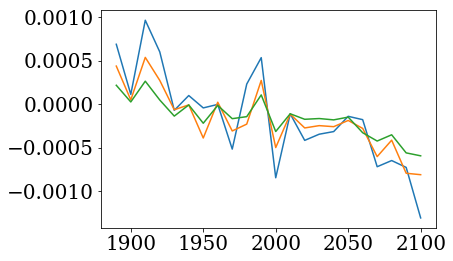

In [17]:
plt.plot(years, diff_snow_avg_DJF)
plt.plot(years, diff_snow_avg_ONDJFM)
plt.plot(years, diff_snow_m)

In [18]:
diff_snow_avg_DJF

[0.00068625303951852512,
 0.00011099442128159609,
 0.00096202744654765493,
 0.00059866781964057481,
 -7.1872129169157459e-05,
 9.7987618742560276e-05,
 -4.3975404946642684e-05,
 -3.775338042549814e-06,
 -0.00051670206207862779,
 0.00022944423940299274,
 0.00053278351096263299,
 -0.00084555920567876608,
 -0.00011193524738275136,
 -0.00041657096238242874,
 -0.0003457622296773229,
 -0.00031559418455076593,
 -0.00014052672688624757,
 -0.00017885312982342713,
 -0.00071891664260121757,
 -0.00064801238115165993,
 -0.0007267558296472123,
 -0.0013063795560316939]

Relative snow change


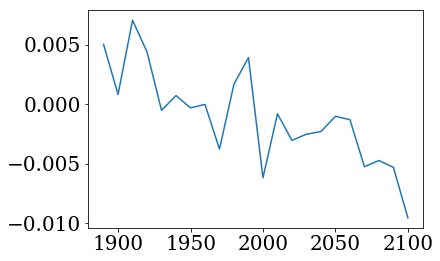

In [19]:
print("Relative snow change")
plt.plot(years, np.array(diff_snow_avg_DJF)/np.array(snow_avg_DJF))

In [20]:
def get_DJF(snow):
    return (snow[0]+snow[1]+snow[11])/3

# Plot absolute changes

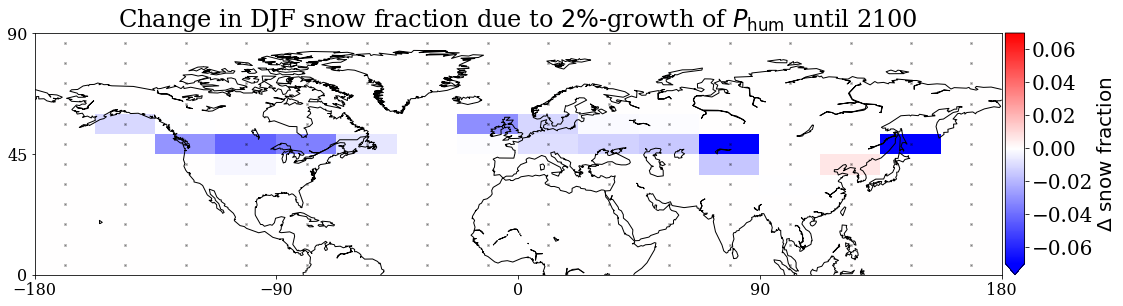

In [23]:

y=2100
ind=np.where(years==y)[0][0]

fig=plt.figure(figsize=(16,5))
ax=fig.add_subplot(111)
array=(p[ind].fs.mean(dim='Time')-ref[ind].fs.mean(dim='Time'))/ref[ind].fs.mean(dim='Time')
array=(get_DJF(p[ind].fs)-get_DJF(ref[ind].fs))#/get_DJF(ref[ind].fs)
naninds=np.where(ref[ind].fs.mean(dim='Time')==0)
#print(naninds)
for i in range(0,len(naninds[0])):
    array[naninds[0][i], naninds[1][i]]=0
plot=ax.pcolormesh(X_atl,Y_atl,change_to_Atl(array),
                   cmap='bwr', vmin=-0.07, vmax=0.07)
ax.set_ylim(0,90)
#cb=fig.colorbar(plot,ax=ax[n], label="$\Delta$ fraction of snow")
ax.set_title(r"Change in DJF snow fraction due to $2\%$-growth of $P_{\rm hum}$ until "+str(y), y=1.0)
m = Basemap(projection='cyl',llcrnrlat=-0,urcrnrlat=90,\
        llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()

crosses_x=[]
crosses_y=[]
for i in range(0,16):
    for j in range(0,24):
        a=p[0].xt_i[i].values-180
        crosses_x.append(a)
        crosses_y.append(p[0].yt_j[j].values)
ax.plot(crosses_x[:], crosses_y[:], 'x', ms=2, color='black', alpha=0.5)

ax.set_xticks([X_atl[0,:][0],X_atl[0,:][len(X_atl[0,:])/4],X_atl[0,:][len(X_atl[0,:])/2],X_atl[0,:][len(X_atl[0,:])/4*3], X_atl[0,:][-1]])
#ax.set_yticks([Y_atl[:,0][0],Y_atl[:,0][len(Y_atl[:,0])/4],Y_atl[:,0][len(Y_atl[:,0])/2],Y_atl[:,0][len(Y_atl[:,0])/4*3], Y_atl[:,0][-1]])
ax.set_yticks([Y_atl[:,0][len(Y_atl[:,0])/2],Y_atl[:,0][len(Y_atl[:,0])/4*3], Y_atl[:,0][-1]])
ax.tick_params(axis='both', which='major', labelsize=16)


from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
cb=plt.colorbar(plot, cax=cax, label=r'$\Delta \ {\rm snow \ fraction}$', extend='min')
fig.tight_layout()
plt.savefig("DeltaSnowFracDJF"+runname+".eps", format='eps', bbox_inches='tight')

In [24]:
print("All large snow frac changes:")
ind=np.where(array<-0.01)
print(ind, np.shape(ind[0]))
for i in range(0,len(ind[0])):
    print(ind[0][i], ind[1][i])
    print(array[ind[0][i], ind[1][i]].values)

All large snow frac changes:
((array([ 1, 17, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19]), array([ 8,  3,  1,  2,  3,  6, 10, 11, 12,  0,  9, 15])), (12,))
(1, 8)
-0.0133884623647
(17, 3)
-0.0156687086555
(18, 1)
-0.0122982362906
(18, 2)
-0.0151905959568
(18, 3)
-0.146827419599
(18, 6)
-0.116787779086
(18, 10)
-0.0292706758922
(18, 11)
-0.0427528619766
(18, 12)
-0.034662147363
(19, 0)
-0.0110010504723
(19, 9)
-0.0108755032221
(19, 15)
-0.0311099092166


# Plot the relative changes in DJF (divided by reference in 2100)

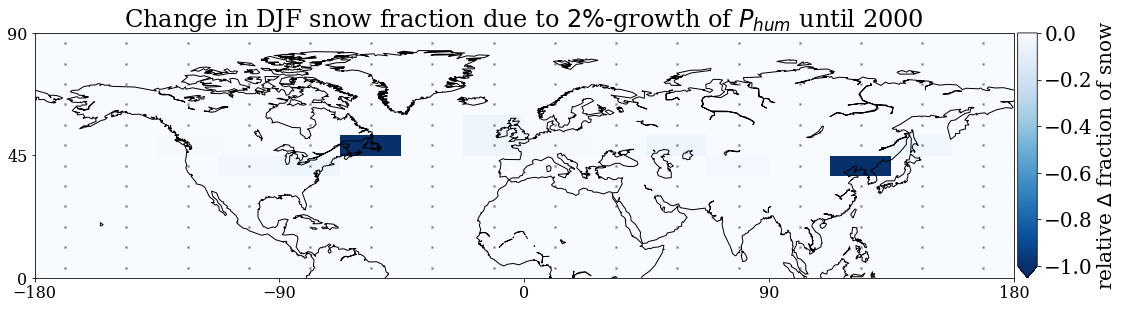

In [28]:
y=2000
ind=np.where(years==y)[0][0]

fig=plt.figure(figsize=(16,5))
ax=fig.add_subplot(111)
#array=(p[ind].fs.mean(dim='Time')-ref[ind].fs.mean(dim='Time'))/ref[ind].fs.mean(dim='Time')
array=(get_DJF(p[ind].fs)-get_DJF(ref[ind].fs))/get_DJF(ref[ind].fs)
naninds=np.where(ref[ind].fs.mean(dim='Time')==0)
#print(naninds)
for i in range(0,len(naninds[0])):
    array[naninds[0][i], naninds[1][i]]=0
plot=ax.pcolormesh(X_atl,Y_atl,change_to_Atl(array),
                   cmap='Blues_r', vmin=-1., vmax=0.)
ax.set_ylim(0,90)
#cb=fig.colorbar(plot,ax=ax[n], label="$\Delta$ fraction of snow")
ax.set_title("Change in DJF snow fraction due to $2\%$-growth of $P_{hum}$ until "+str(y), y=1.0)
m = Basemap(projection='cyl',llcrnrlat=0,urcrnrlat=90,\
        llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()

crosses_x=[]
crosses_y=[]
for i in range(0,16):
    for j in range(0,24):
        a=p[0].xt_i[i].values-180
        crosses_x.append(a)
        crosses_y.append(p[0].yt_j[j].values)
ax.plot(crosses_x[:], crosses_y[:], 'x', ms=2, color='black', alpha=0.5)

ax.set_xticks([X_atl[0,:][0],X_atl[0,:][len(X_atl[0,:])/4],X_atl[0,:][len(X_atl[0,:])/2],X_atl[0,:][len(X_atl[0,:])/4*3], X_atl[0,:][-1]])
#ax.set_yticks([Y_atl[:,0][0],Y_atl[:,0][len(Y_atl[:,0])/4],Y_atl[:,0][len(Y_atl[:,0])/2],Y_atl[:,0][len(Y_atl[:,0])/4*3], Y_atl[:,0][-1]])
ax.set_yticks([Y_atl[:,0][len(Y_atl[:,0])/2],Y_atl[:,0][len(Y_atl[:,0])/4*3], Y_atl[:,0][-1]])
ax.tick_params(axis='both', which='major', labelsize=16)


from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
cb=plt.colorbar(plot, cax=cax, label='relative $\Delta$ fraction of snow', extend='min')
fig.tight_layout()
#plt.savefig("rel_DeltaSnowFracDJF.png")

In [29]:
ind=np.where(array<-0.04)
print(ind, np.shape(ind[0]))
for i in range(0,len(ind[0])):
    print(ind[0][i], ind[1][i])
    print(array[ind[0][i], ind[1][i]].values)

((array([17, 17, 18, 18, 18, 19]), array([ 5, 12,  2, 13, 15, 15])), (6,))
(17, 5)
-0.999996784818
(17, 12)
-0.0482272616911
(18, 2)
-0.0489621246195
(18, 13)
-1.0
(18, 15)
-0.0430461962624
(19, 15)
-0.0448424308772


# Get values for DJF in Kazakhstan

In [30]:
diff=get_DJF(p[-1].fs)-get_DJF(ref[-1].fs)
print("Difference of snow fraction: ", diff[18,3].values)
print("Perturbed snow fraction: ", get_DJF(p[-1].fs)[18,3].values)
print("Reference snow fraction: ", get_DJF(ref[-1].fs)[18,3].values)


('Difference of snow fraction: ', array(-0.14682741959889734))
('Perturbed snow fraction: ', array(0.6666666666666666))
('Reference snow fraction: ', array(0.813494086265564))


# Plot the toal snow fraciton

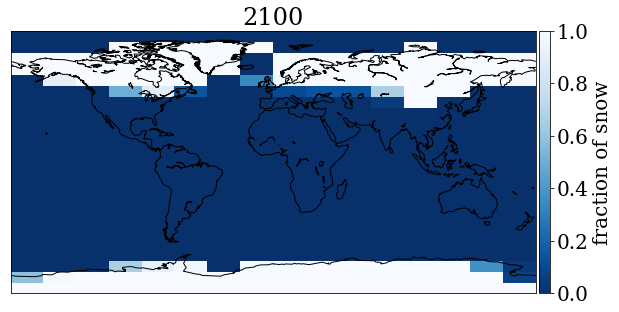

In [31]:

y=2100
ind=np.where(years==y)[0][0]

fig=plt.figure(figsize=(9,8))
ax=fig.add_subplot(111)
array=(p[ind].fs.mean(dim='Time')-ref[ind].fs.mean(dim='Time'))
array=get_DJF(p[ind].fs)
plot=ax.pcolormesh(X_atl,Y_atl,change_to_Atl(array),
                   cmap='Blues_r')
#cb=fig.colorbar(plot,ax=ax[n], label="$\Delta$ fraction of snow")
ax.set_title(str(y))
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
        llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
cb=plt.colorbar(plot, cax=cax, label='fraction of snow')
fig.tight_layout()